<h1 align=center> Happiness Prediction </h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,RocCurveDisplay
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE 
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./happiness classification.csv')
data.head()

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
0,3,3,3,4,2,4,0
1,3,2,3,5,4,3,0
2,5,3,3,3,3,5,1
3,5,4,3,3,3,5,0
4,5,4,3,3,3,5,0


In [3]:
data.isnull().sum()

infoavail        0
housecost        0
schoolquality    0
policetrust      0
streetquality    0
ëvents           0
happy            0
dtype: int64

In [4]:
data.duplicated().sum()

18

In [5]:
x = data.iloc[:,:-1].values

In [6]:
y = data.iloc[:,-1].values

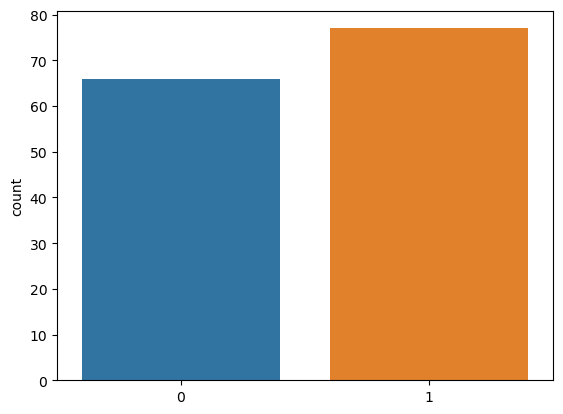

In [7]:
sns.countplot(x=y)
plt.show()

In [8]:
x,y = SMOTE().fit_resample(x,y)

In [9]:
sc = StandardScaler()

In [10]:
x= sc.fit_transform(x)

In [11]:
models ={
    "LogisticRegression":LogisticRegression(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "AdaBoostClassifier":AdaBoostClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "KNeighborsClassifier":KNeighborsClassifier()
}

In [12]:
for name,model in models.items():
    scores = cross_val_score(model,x,y,scoring="accuracy",cv=10,n_jobs=-1)
    print("cross validation model:{}".format(name))
    print("mean score:",np.mean(scores)*100)
    print("*"*100)

cross validation model:LogisticRegression
mean score: 57.25
****************************************************************************************************
cross validation model:DecisionTreeClassifier
mean score: 58.54166666666666
****************************************************************************************************
cross validation model:RandomForestClassifier
mean score: 59.25
****************************************************************************************************
cross validation model:AdaBoostClassifier
mean score: 53.333333333333336
****************************************************************************************************
cross validation model:GradientBoostingClassifier
mean score: 59.20833333333334
****************************************************************************************************
cross validation model:KNeighborsClassifier
mean score: 50.83333333333333
********************************************************************

###### selecting RandomForestClassifier

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [14]:
model = RandomForestClassifier()

In [15]:
model.fit(x_train,y_train)
print("Model terained with logistic regression")
score_train = accuracy_score(y_train,model.predict(x_train))
score_test = accuracy_score(y_test,model.predict(x_test))
con_train = confusion_matrix(y_train,model.predict(x_train))
con_test = confusion_matrix(y_test,model.predict(x_test))
print("Model accuracy on train is:",score_train)
print("Model accuracy on test is :",score_test)
print("confusion_matrix train is:",con_train)
print("Confusion_matrix test is",con_test)
print("wrong predictions made:",((y_test !=model.predict(x_test)).sum(),'/',
                                 ((y_test == model.predict(x_test)).sum()+
                                  (y_test != model.predict(x_test)).sum())))

Model terained with logistic regression
Model accuracy on train is: 0.975609756097561
Model accuracy on test is : 0.5161290322580645
confusion_matrix train is: [[60  2]
 [ 1 60]]
Confusion_matrix test is [[8 7]
 [8 8]]
wrong predictions made: (15, '/', 31)


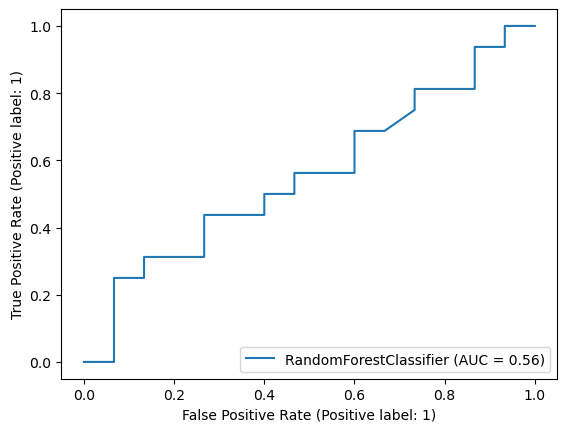

In [16]:
ROC_display = RocCurveDisplay.from_estimator(model,x_test,y_test)